In [2]:
from citipy import citipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from config import API_Key


In [3]:
#generate dic of 500 unique random cities and save their lat and lon
cities={}
while len(cities) < 500:
    lat=round(np.random.uniform(-89.9,89.9),3)
    lon=round(np.random.uniform(-179.99,179.99),3)
    city=citipy.nearest_city(lat,lon)
    if city not in cities:
        cities[city.city_name]={}
        cities[city.city_name]['Latitude']=lat
        cities[city.city_name]['Longitude']=lon


In [6]:
#get weather data for each of the cities and store the useful information back into the dictionary

i=1
for city in cities.keys():
    print(f"City {i}: {city}")
    lat=cities[city]['Latitude']
    lon=cities[city]['Longitude']
    url=f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_Key}&units=imperial"
    weather_data=requests.get(url).json()
    cities[city]['Temperature']=weather_data['main']['temp']
    cities[city]['Humidity']=weather_data['main']['humidity']
    cities[city]['Cloudiness']=weather_data['clouds']['all']
    cities[city]['Wind Speed']=weather_data['wind']['speed']
    i+=1


City 1: mar del plata
City 2: tsihombe
City 3: rikitea
City 4: east london
City 5: kiunga
City 6: kasongo-lunda
City 7: taolanaro
City 8: bambous virieux
City 9: atuona
City 10: along
City 11: sinkat
City 12: pevek
City 13: yerbogachen
City 14: rayong
City 15: tasiilaq
City 16: fort madison
City 17: bodden town
City 18: seoul
City 19: vila velha
City 20: mezhevoy
City 21: illoqqortoormiut
City 22: albany
City 23: yenagoa
City 24: lorengau
City 25: payo
City 26: coquimbo
City 27: avarua
City 28: hermanus
City 29: harper
City 30: sorland
City 31: samsun
City 32: nizhneyansk
City 33: oyama
City 34: saskylakh
City 35: araouane
City 36: vaini
City 37: chokurdakh
City 38: longyearbyen
City 39: cape town
City 40: singaraja
City 41: pemangkat
City 42: bengkulu
City 43: marfino
City 44: camacha
City 45: panzhihua
City 46: hilo
City 47: kargapolye
City 48: port alfred
City 49: yellowknife
City 50: freeport
City 51: zhigansk
City 52: ponta do sol
City 53: jining
City 54: dikson
City 55: puerto ay

In [32]:
cities_df=pd.DataFrame.from_dict(cities,orient='index')
cities_df.to_csv("Data/City_Weather.csv")
pd.set_option('display.max_rows',100)
cities_df

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
mar del plata,-57.192,-40.099,33.10,98,100,19.69
tsihombe,-46.181,47.804,42.46,96,100,31.09
rikitea,-30.865,-113.224,64.72,56,49,17.36
east london,-65.144,49.676,12.78,82,100,15.59
kiunga,-6.064,139.136,83.16,73,99,4.07
...,...,...,...,...,...,...
vangaindrano,-24.584,50.383,71.10,61,0,15.50
kalmar,55.819,16.870,58.87,88,5,12.80
chinhoyi,-16.985,30.459,50.22,86,0,1.63
abu samrah,20.561,49.407,86.29,13,2,5.01


In [3]:
cities_df=pd.read_csv("Data/City_Weather.csv",index_col=0)
cities_df

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
mar del plata,-57.192,-40.099,33.10,98,100,19.69
tsihombe,-46.181,47.804,42.46,96,100,31.09
rikitea,-30.865,-113.224,64.72,56,49,17.36
east london,-65.144,49.676,12.78,82,100,15.59
kiunga,-6.064,139.136,83.16,73,99,4.07
...,...,...,...,...,...,...
vangaindrano,-24.584,50.383,71.10,61,0,15.50
kalmar,55.819,16.870,58.87,88,5,12.80
chinhoyi,-16.985,30.459,50.22,86,0,1.63
abu samrah,20.561,49.407,86.29,13,2,5.01


Observations of the scatter plot below, exploring the dependent variable temperature vs. dependent variable Latitude:
As the latitude approaches 0 from either end, the temperature tends to increase
Some variation in temperature at each latitude is likely caused by some cities being measured in the day and some at night.
The overall shape of the relationship is parabolic


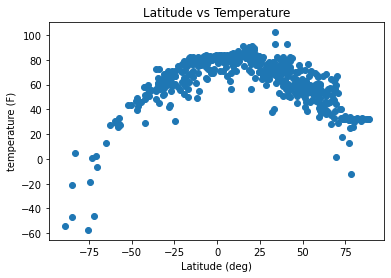

In [5]:
plt.scatter(cities_df['Latitude'],cities_df['Temperature'])
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude (deg)")
plt.ylabel("temperature (F)")
plt.show
plt.savefig("Charts/LatVTemp.png")
print("Observations of the scatter plot below, exploring the dependent variable temperature vs. dependent variable Latitude:")
print("As the latitude approaches 0 from either end, the temperature tends to increase")
print("Some variation in temperature at each latitude is likely caused by some cities being measured in the day and some at night.")
print("The overall shape of the relationship is parabolic")

Obersvations of Latitude v Humidity:
Nea the equator and near the poles there are no cities measured with low humidity compared to those at latitudes in between
There is far more variation in humidity measured in cities between the Tropic of Cancer and the Arctic circle, and the Topic of Capricorn and the Antarctic circle.


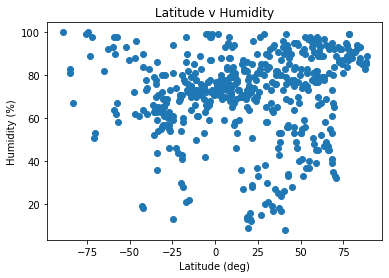

In [6]:
plt.scatter(cities_df['Latitude'],cities_df['Humidity'])
plt.title("Latitude v Humidity")
plt.xlabel("Latitude (deg)")
plt.ylabel("Humidity (%)")
plt.show
plt.savefig("Charts/LatVHumid.png")
print("Obersvations of Latitude v Humidity:")
print("Nea the equator and near the poles there are no cities measured with low humidity compared to those at latitudes in between")
print("There is far more variation in humidity measured in cities between the Tropic of Cancer and the Arctic circle, and the Topic of Capricorn and the Antarctic circle.")

Observations of Latitude v Cloudiness
There does not appear to be any relationship between cloudiness and latitude.
There is a large variation of cloudiness measured for cities at all latitudes.


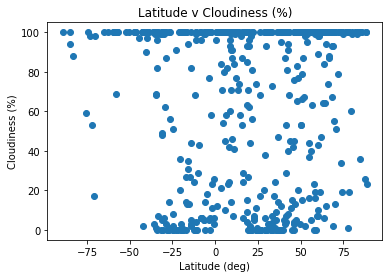

In [7]:
plt.scatter(cities_df['Latitude'],cities_df['Cloudiness'])
plt.title("Latitude v Cloudiness (%)")
plt.xlabel("Latitude (deg)")
plt.ylabel("Cloudiness (%)")
plt.show
plt.savefig("Charts/LatVCloudiness.png")
print("Observations of Latitude v Cloudiness")
print("There does not appear to be any relationship between cloudiness and latitude.")
print("There is a large variation of cloudiness measured for cities at all latitudes.")

Observations of Latitude v Wind Speed:
There does not appear to be a relationship between latitude and wind speed.


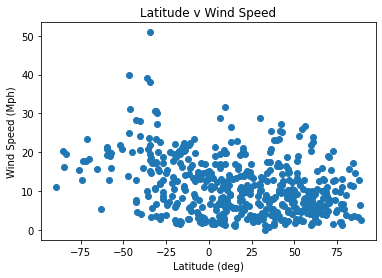

In [8]:
plt.scatter(cities_df['Latitude'],cities_df['Wind Speed'])
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude (deg)")
plt.ylabel("Wind Speed (Mph)")
plt.show
plt.savefig("Charts/LatVWindSpeed.png")
print("Observations of Latitude v Wind Speed:")
print("There does not appear to be a relationship between latitude and wind speed.")

In [10]:
cities_southern=cities_df.query("Latitude<0")
cities_southern


,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
mar del plata,-57.192,-40.099,33.10,98,100,19.69
tsihombe,-46.181,47.804,42.46,96,100,31.09
rikitea,-30.865,-113.224,64.72,56,49,17.36
east london,-65.144,49.676,12.78,82,100,15.59
kiunga,-6.064,139.136,83.16,73,99,4.07
...,...,...,...,...,...,...
mulanje,-16.419,36.003,61.88,90,100,1.99
madang,-5.607,145.993,79.36,72,100,3.20
taltal,-24.929,-68.744,30.61,13,0,3.89
vangaindrano,-24.584,50.383,71.10,61,0,15.50


In [11]:
cities_northern=cities_df.query("Latitude >= 0")
cities_northern

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
along,31.817,95.342,38.23,92,100,2.86
sinkat,18.770,35.857,88.07,14,4,4.07
pevek,88.802,166.174,31.91,89,23,2.53
yerbogachen,64.869,107.640,56.35,49,12,7.02
rayong,11.365,101.147,83.82,76,100,12.73
...,...,...,...,...,...,...
korablino,53.966,40.034,59.02,83,95,4.79
slantsy,58.963,28.172,58.68,82,100,4.09
kalmar,55.819,16.870,58.87,88,5,12.80
abu samrah,20.561,49.407,86.29,13,2,5.01


There is a nagative linear relationship between temperature and latitude for the northern hemisphere.


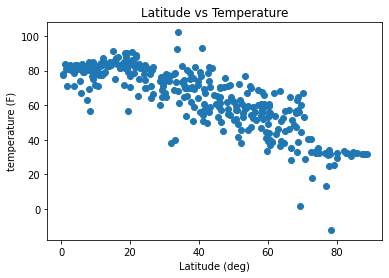

In [12]:
plt.scatter(cities_northern['Latitude'],cities_northern['Temperature'])
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude (deg)")
plt.ylabel("temperature (F)")
plt.show
plt.savefig("Charts/NORTHLatVTemp.png")
print("There is a nagative linear relationship between temperature and latitude for the northern hemisphere.")

There is a positive linear relationship between latitude and temperature for the southern hemisphere.


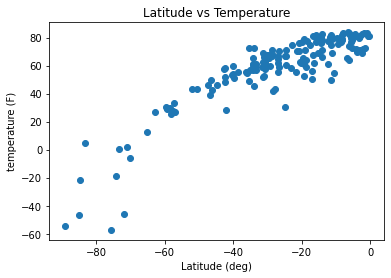

In [13]:
plt.scatter(cities_southern['Latitude'],cities_southern['Temperature'])
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude (deg)")
plt.ylabel("temperature (F)")
plt.show
plt.savefig("Charts/SOUTHLatVTemp.png")
print("There is a positive linear relationship between latitude and temperature for the southern hemisphere.")

There does not appear to be a linear association between latitude and humidy in the northern hemisphere.
Hoever, near the equator and the poles the data does not show any locations with low humidity.


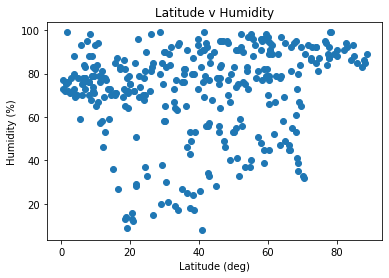

In [14]:
plt.scatter(cities_northern['Latitude'],cities_northern['Humidity'])
plt.title("Latitude v Humidity")
plt.xlabel("Latitude (deg)")
plt.ylabel("Humidity (%)")
plt.show
plt.savefig("Charts/NORTHLatVHumid.png")
print("There does not appear to be a linear association between latitude and humidy in the northern hemisphere.")
print("Hoever, near the equator and the poles the data does not show any locations with low humidity.")

There does not appear to be a linear association between latitude and humidy in the southern hemisphere.
Hoever, near the equator and the poles the data does not show any locations with low humidity.


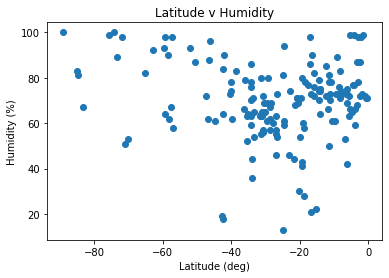

In [15]:
plt.scatter(cities_southern['Latitude'],cities_southern['Humidity'])
plt.title("Latitude v Humidity")
plt.xlabel("Latitude (deg)")
plt.ylabel("Humidity (%)")
plt.show
plt.savefig("Charts/SOUTHLatVHumid.png")
print("There does not appear to be a linear association between latitude and humidy in the southern hemisphere.")
print("Hoever, near the equator and the poles the data does not show any locations with low humidity.")

There does not appear to be any relationship between latitude and cloudiness in the northern hemisphere.


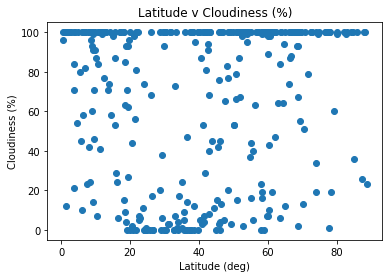

In [16]:
plt.scatter(cities_northern['Latitude'],cities_northern['Cloudiness'])
plt.title("Latitude v Cloudiness (%)")
plt.xlabel("Latitude (deg)")
plt.ylabel("Cloudiness (%)")
plt.show
plt.savefig("Charts/NORTHLatVCloud.png")
print("There does not appear to be any relationship between latitude and cloudiness in the northern hemisphere.")

There does not appear to be any relationship between latitude and cloudiness in the northern hemisphere.


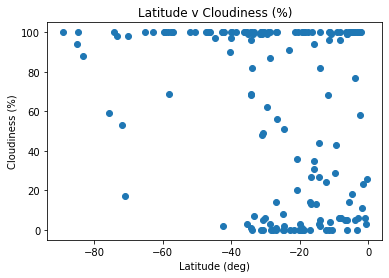

In [17]:
plt.scatter(cities_southern['Latitude'],cities_southern['Cloudiness'])
plt.title("Latitude v Cloudiness (%)")
plt.xlabel("Latitude (deg)")
plt.ylabel("Cloudiness (%)")
plt.show
plt.savefig("Charts/SOUTHLatVCloud.png")
print("There does not appear to be any relationship between latitude and cloudiness in the northern hemisphere.")

There does not appear to be any relationship between latitude and wind speed in the northern hemisphere.


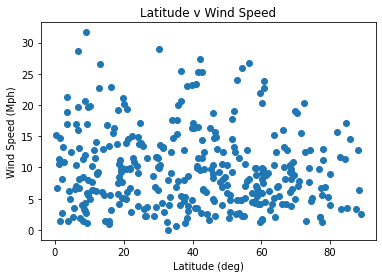

In [18]:
plt.scatter(cities_northern['Latitude'],cities_northern['Wind Speed'])
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude (deg)")
plt.ylabel("Wind Speed (Mph)")
plt.show
plt.savefig("Charts/NORTHLatVWindSpeed.png")
print("There does not appear to be any relationship between latitude and wind speed in the northern hemisphere.")

Text(0, 0.5, 'Wind Speed (Mph)')

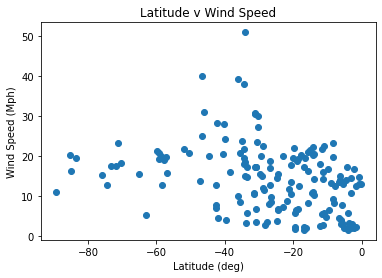

In [17]:
plt.scatter(cities_southern['Latitude'],cities_southern['Wind Speed'])
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude (deg)")
plt.ylabel("Wind Speed (Mph)")
plt.show
plt.savefig("Charts/SOUTHLatVWindSpeed.png")
print("There does not appear to be any relationship between latitude and wind speed in the southern hemisphere.")